In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
url = "https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Insurance%20Claim%20Fraud%20Detection/Automobile_insurance_fraud.csv"
df = pd.read_csv(url)

In [4]:
df.head()

,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES.1,71610,6510,13020,52080,Saab,92x,2004,Y
0,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
1,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
2,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
3,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
4,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,2,NO,64100,6410,6410,51280,Saab,95,2003,Y


In [5]:
df.columns=['months_as_customer','age','policy_number','policy_bind_date','policy_state','policy_csl','policy_deductable','policy_annual_premium','umbrella_limit','insured_zip','insured_sex','insured_education_level','insured_occupation','insured_hobbies','insured_relationship','capital_gains','capital_loss','incident_date','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','incident_location','incident_hour_of_the_day','number_of_vehicles_involved','property_damage','bodily_injuries','witnesses','police_report_available','total_claim_amount','injury_claim','property_claim','vehicle_claim','auto_make','auto_model','auto_year','fraud_reported']
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
1,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
2,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
3,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
4,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,2,NO,64100,6410,6410,51280,Saab,95,2003,Y


In [6]:
df=df.set_index('policy_number')
df.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
policy_number,,,,,,,,,,,,,,,,,,,,,
342868,228,42,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
687698,134,29,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
227811,256,41,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
367455,228,44,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
104594,256,39,12-10-2006,OH,250/500,1000,1351.10,0,478456,FEMALE,...,2,NO,64100,6410,6410,51280,Saab,95,2003,Y


In [7]:
df.replace('?',np.nan,inplace=True)


In [8]:
print('The Shape of the dataset is',df.shape)

The Shape of the dataset is (999, 38)


In [9]:
print('The Columns of the dataset are',df.columns)

The Columns of the dataset are Index(['months_as_customer', 'age', 'policy_bind_date', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital_gains', 'capital_loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')


In [11]:
print('The number of duplicated rows are',df.duplicated().sum())

The number of duplicated rows are 0


In [12]:
df.isna().sum()

months_as_customer               0
age                              0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital_gains                    0
capital_loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses           

In [13]:
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 342868 to 556080
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           999 non-null    int64  
 1   age                          999 non-null    int64  
 2   policy_bind_date             999 non-null    object 
 3   policy_state                 999 non-null    object 
 4   policy_csl                   999 non-null    object 
 5   policy_deductable            999 non-null    int64  
 6   policy_annual_premium        999 non-null    float64
 7   umbrella_limit               999 non-null    int64  
 8   insured_zip                  999 non-null    int64  
 9   insured_sex                  999 non-null    object 
 10  insured_education_level      999 non-null    object 
 11  insured_occupation           999 non-null    object 
 12  insured_hobbies              999 non-null    object 
 13  insured_rela

In [15]:
df.nunique().to_frame('Unique Values')

,Unique Values
months_as_customer,391
age,46
policy_bind_date,950
policy_state,3
policy_csl,3
policy_deductable,3
policy_annual_premium,990
umbrella_limit,11
insured_zip,994
insured_sex,2


In [17]:
cat_cols=df.select_dtypes(include=['object']).columns
num_cols=df.select_dtypes(include=['int64','float64']).columns
print('Categorical Columns are ')
print(cat_cols)
print('Numerical Columns are ')
print(num_cols)

Categorical Columns are 
Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported'],
      dtype='object')
Numerical Columns are 
Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital_gains', 'capital_loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year'],
      dtype='object')


In [18]:
for col in cat_cols:
    print(col)
    print(df[col].value_counts())
    print('='*50)

policy_bind_date
05-08-1992    3
01-01-2006    3
28-04-1992    3
09-08-2004    2
09-03-2003    2
             ..
12-12-1998    1
18-02-1999    1
30-10-1997    1
29-11-1999    1
11-11-1996    1
Name: policy_bind_date, Length: 950, dtype: int64
policy_state
OH    351
IL    338
IN    310
Name: policy_state, dtype: int64
policy_csl
250/500     350
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
insured_sex
FEMALE    537
MALE      462
Name: insured_sex, dtype: int64
insured_education_level
JD             161
High School    160
Associate      145
MD             143
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
insured_occupation
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         73
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cl

In [19]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
months_as_customer,999.0,NaN,NaN,NaN,203.82983,115.103809,0.0,115.5,199.0,276.0,479.0
age,999.0,NaN,NaN,NaN,38.938939,9.14037,19.0,32.0,38.0,44.0,64.0
policy_bind_date,999,950,05-08-1992,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
policy_state,999,3,OH,351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
policy_csl,999,3,250/500,350,NaN,NaN,NaN,NaN,NaN,NaN,NaN
policy_deductable,999.0,NaN,NaN,NaN,1136.136136,612.155989,500.0,500.0,1000.0,2000.0,2000.0
policy_annual_premium,999.0,NaN,NaN,NaN,1256.255495,244.243187,433.33,1089.185,1257.04,1415.71,2047.59
umbrella_limit,999.0,NaN,NaN,NaN,1102102.102102,2298292.819759,-1000000.0,0.0,0.0,0.0,10000000.0
insured_zip,999.0,NaN,NaN,NaN,501249.605606,71728.919924,430104.0,448373.0,466498.0,603254.0,620962.0
insured_sex,999,2,FEMALE,537,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital_gains,capital_loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,999.000000,999.000000,999.000000,999.000000,9.990000e+02,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,203.829830,38.938939,1136.136136,1256.255495,1.102102e+06,501249.605606,25097.897898,-26820.520521,11.650651,1.839840,0.991992,1.486486,52743.073073,7434.344344,7393.943944,37914.784785,2005.104104
std,115.103809,9.140370,612.155989,244.243187,2.298293e+06,71728.919924,27871.869471,28105.366259,6.951671,1.019044,0.820538,1.111773,26408.011569,4883.309038,4823.859773,18890.397013,6.018773
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.000000,0.000000,0.000000,100.000000,0.000000,0.000000,70.000000,1995.000000
25%,115.500000,32.000000,500.000000,1089.185000,0.000000e+00,448373.000000,0.000000,-51500.000000,6.000000,1.000000,0.000000,1.000000,41775.000000,4290.000000,4440.000000,30275.000000,2000.000000
50%,199.000000,38.000000,1000.000000,1257.040000,0.000000e+00,466498.000000,0.000000,-24100.000000,12.000000,1.000000,1.000000,1.000000,57970.000000,6780.000000,6750.000000,42080.000000,2005.000000
75%,276.000000,44.000000,2000.000000,1415.710000,0.000000e+00,603254.000000,51000.000000,0.000000,17.000000,3.000000,2.000000,2.000000,70550.000000,11310.000000,10870.000000,50775.000000,2010.000000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.000000,2.000000,3.000000,114920.000000,21450.000000,23670.000000,79560.000000,2015.000000


<Axes: xlabel='count', ylabel='insured_education_level'>

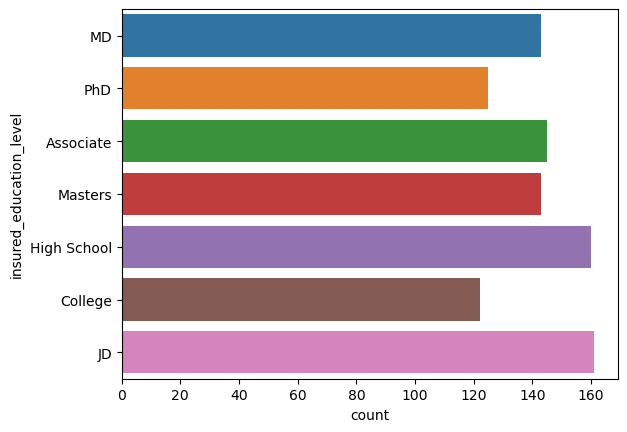

In [23]:
sns.countplot(y=df['insured_education_level'])

<Axes: xlabel='count', ylabel='insured_occupation'>

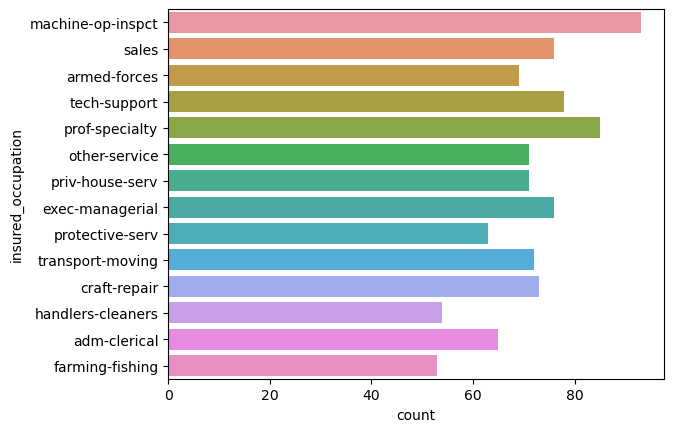

In [24]:
sns.countplot(y=df['insured_occupation'])

<Axes: xlabel='count', ylabel='insured_hobbies'>

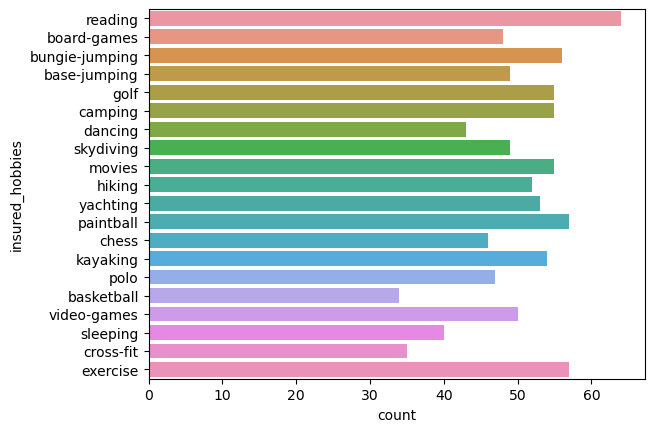

In [25]:
sns.countplot(y=df['insured_hobbies'])

<Axes: xlabel='count', ylabel='insured_relationship'>

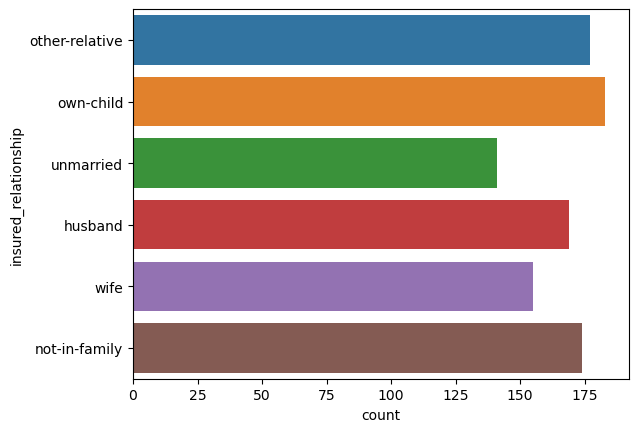

In [26]:
sns.countplot(y=df['insured_relationship'])

<Axes: xlabel='count', ylabel='incident_type'>

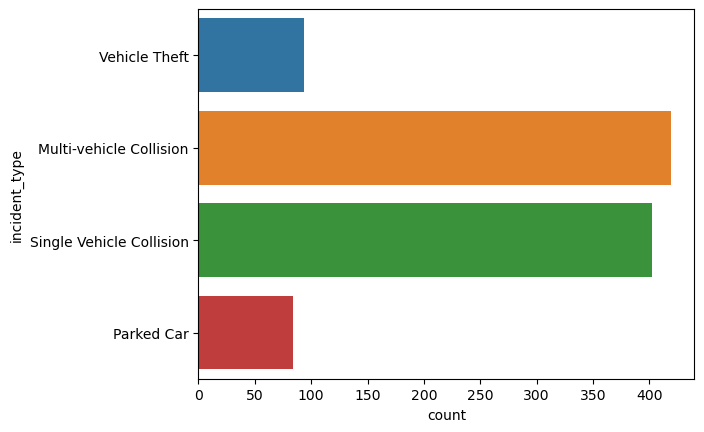

In [27]:
sns.countplot(y=df['incident_type'])

<Axes: xlabel='count', ylabel='collision_type'>

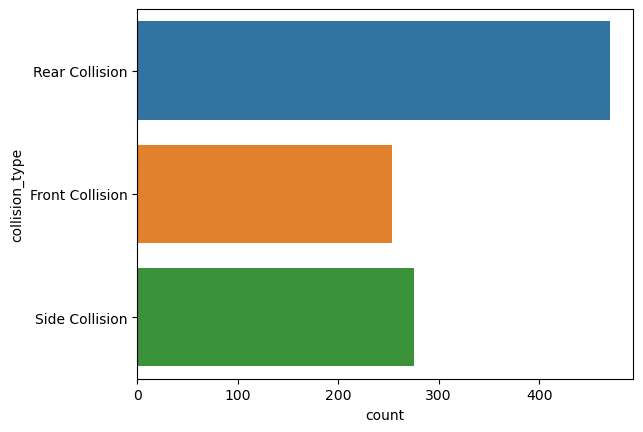

In [28]:
sns.countplot(y=df['collision_type'])

<Axes: xlabel='count', ylabel='authorities_contacted'>

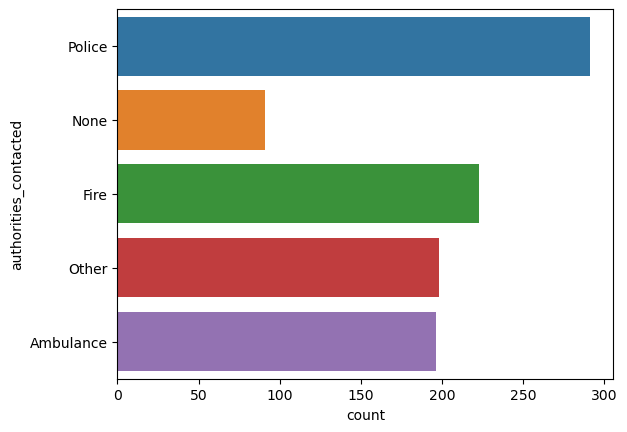

In [29]:
sns.countplot(y=df['authorities_contacted'])

<Axes: xlabel='count', ylabel='incident_city'>

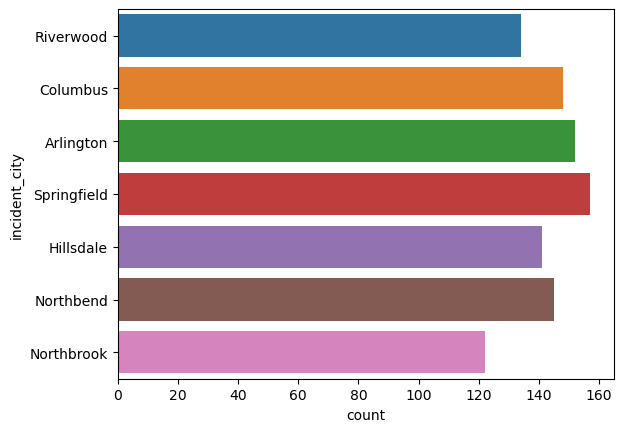

In [31]:
sns.countplot(y=df['incident_city'])

<Axes: xlabel='count', ylabel='property_damage'>

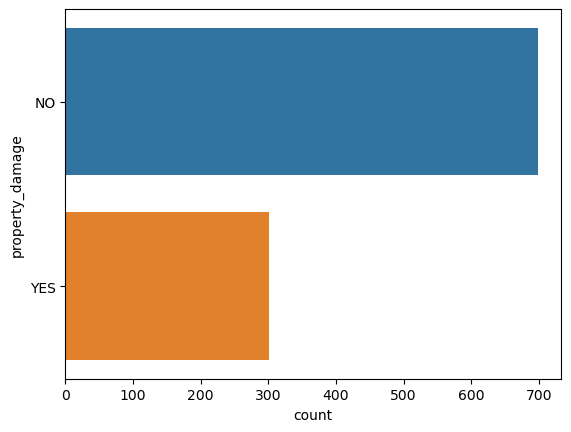

In [32]:
sns.countplot(y=df['property_damage'])

<Axes: xlabel='count', ylabel='auto_make'>

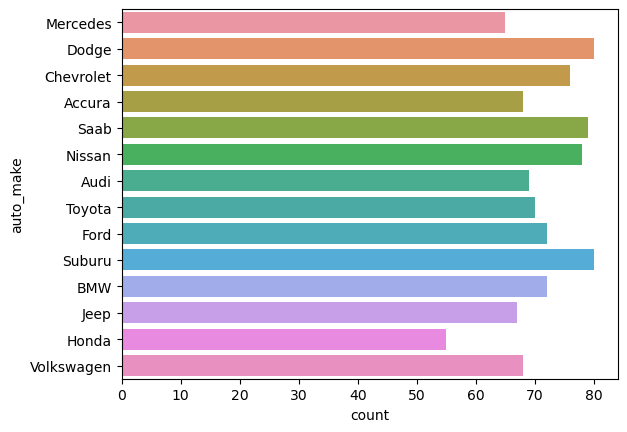

In [33]:
sns.countplot(y=df['auto_make'])

<Axes: xlabel='count', ylabel='fraud_reported'>

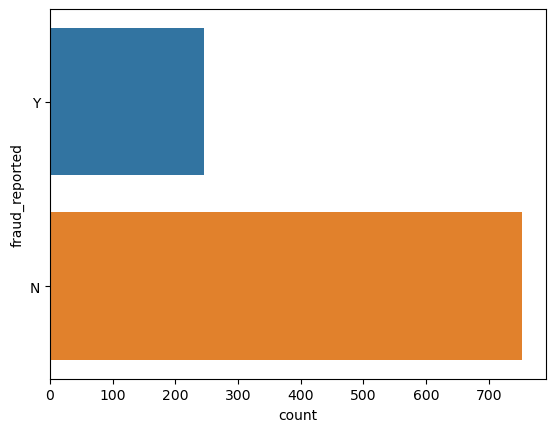

In [34]:
sns.countplot(y=df['fraud_reported'])